In [1]:
text = "This is my test. We're keeping this text short to keep things manageable."

def count_words(text):
    '''
    Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts. Skip punctuation.
    '''
    text = text.lower()
    skips = [".",",",";",":","''",'"']
    
    for ch in skips:
        text = text.replace(ch,"")
        
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

from collections import Counter

def count_words_fast(text): 
    '''
    Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts. Skip punctuation.
    '''
    text = text.lower()
    skips = [".",",",";",":","''",'"']
    
    for ch in skips:
        text = text.replace(ch,"")
        
    word_counts = Counter(text.split(" "))
    return word_counts 

In [2]:
print(count_words(text))

{'this': 2, 'is': 1, 'my': 1, 'test': 1, "we're": 1, 'keeping': 1, 'text': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable': 1}


In [3]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [4]:
print(count_words_fast(text))

Counter({'this': 2, 'is': 1, 'my': 1, 'test': 1, "we're": 1, 'keeping': 1, 'text': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable': 1})


In [5]:
count_words(text) is count_words_fast(text)

False

In [6]:
count_words(text) == count_words_fast(text)

True

In [7]:
def read_book(title_path):
    '''
    Read a book and return it as a string
    '''
    with open(title_path,"r",encoding='utf8') as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return text

In [8]:
text = read_book("./Books_EngFr/Eng_shakespeare/Romeo and Juliet.txt")
print(len(text))
ind = text.find("What's in a name?")
print(ind)
sample_text = text[ind:ind+1000]
print(sample_text)

169275
42757
What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place d

In [9]:
def word_stats(word_counts):
    '''
    return number of unique words and words frequencies
    '''
    num_unique = len(word_counts)
    counts = word_counts.values() 
    return (num_unique,counts)

In [10]:
text = read_book("./Books_EngFr/Eng_shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text)
(num,unique) = word_stats(word_counts)

In [11]:
print(num) 
sum(unique)

5223


40776

In [12]:
text = read_book("./Books_GerPort/Ger_shakespeare/Romeo und Julia.txt")
word_counts = count_words(text)
(num,unique) = word_stats(word_counts)

In [13]:
print(num) 
sum(unique)

7543


20311

In [14]:
import os

book_dir = ""  #updated to reflect current directory
book_dir = ["./Books_GerPort","./Books_EngFr"]

for language in book_dir:
    for author in os.listdir(language):
        for title in os.listdir(language+"/"+author):
            input_file = language+"/"+author+"/"+title
            print(input_file)
            text = read_book(input_file) 
            (num_unique,counts) = word_stats(count_words(text))

./Books_GerPort/Ger_raimund/Der Diamant des Geisterkînigs.txt
./Books_GerPort/Ger_raimund/Der Barometermacher auf der Zauberinsel.txt
./Books_GerPort/Ger_raimund/Die unheilbringende Krone.txt
./Books_GerPort/Ger_raimund/Die gefesselte Phantasie.txt
./Books_GerPort/Ger_raimund/Der Alpenkînig und der Menschenfeind.txt
./Books_GerPort/Ger_raimund/Moisasurs Zauberfluch.txt
./Books_GerPort/Ger_raimund/Der Verschwender.txt
./Books_GerPort/Ger_raimund/Das MÑdchen aus der Feenwelt.txt
./Books_GerPort/Por_branco/O Regicida.txt
./Books_GerPort/Por_branco/Livro de Consolação.txt
./Books_GerPort/Por_branco/Amor de Perdição.txt
./Books_GerPort/Por_branco/Lagrimas Abenáoadas.txt
./Books_GerPort/Por_branco/Estrellas Prop°cias.txt
./Books_GerPort/Por_branco/Agulha em Palheiro.txt
./Books_GerPort/Por_branco/A Neta do Arcediago.txt
./Books_GerPort/Por_branco/A Filha do Arcediago.txt
./Books_GerPort/Por_branco/Amor de Salvação.txt
./Books_GerPort/Por_branco/O que fazem mulheres.txt
./Books_GerPort/Por_br

In [15]:
import pandas as pd

book_dir = ["./Books_GerPort","./Books_EngFr"]

stats = pd.DataFrame(columns=("language","author","title","unique","unique"))
title_num = 1

for language in book_dir:
    for author in os.listdir(language):
        for title in os.listdir(language+"/"+author):
            input_file = language+"/"+author+"/"+title
            print(input_file)
            text = read_book(input_file) 
            (num_unique,counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author, title, sum(counts), num_unique
            title_num +=1


./Books_GerPort/Ger_raimund/Der Diamant des Geisterkînigs.txt
./Books_GerPort/Ger_raimund/Der Barometermacher auf der Zauberinsel.txt
./Books_GerPort/Ger_raimund/Die unheilbringende Krone.txt
./Books_GerPort/Ger_raimund/Die gefesselte Phantasie.txt
./Books_GerPort/Ger_raimund/Der Alpenkînig und der Menschenfeind.txt
./Books_GerPort/Ger_raimund/Moisasurs Zauberfluch.txt
./Books_GerPort/Ger_raimund/Der Verschwender.txt
./Books_GerPort/Ger_raimund/Das MÑdchen aus der Feenwelt.txt
./Books_GerPort/Por_branco/O Regicida.txt
./Books_GerPort/Por_branco/Livro de Consolação.txt
./Books_GerPort/Por_branco/Amor de Perdição.txt
./Books_GerPort/Por_branco/Lagrimas Abenáoadas.txt
./Books_GerPort/Por_branco/Estrellas Prop°cias.txt
./Books_GerPort/Por_branco/Agulha em Palheiro.txt
./Books_GerPort/Por_branco/A Neta do Arcediago.txt
./Books_GerPort/Por_branco/A Filha do Arcediago.txt
./Books_GerPort/Por_branco/Amor de Salvação.txt
./Books_GerPort/Por_branco/O que fazem mulheres.txt
./Books_GerPort/Por_br

In [16]:
stats.head(5)

,language,author,title,unique,unique
1,./Books_GerPort,Ger_raimund,Der Diamant des Geisterkînigs.txt,18855,5995
2,./Books_GerPort,Ger_raimund,Der Barometermacher auf der Zauberinsel.txt,16032,5319
3,./Books_GerPort,Ger_raimund,Die unheilbringende Krone.txt,24701,7605
4,./Books_GerPort,Ger_raimund,Die gefesselte Phantasie.txt,16651,5824
5,./Books_GerPort,Ger_raimund,Der Alpenkînig und der Menschenfeind.txt,21802,7002


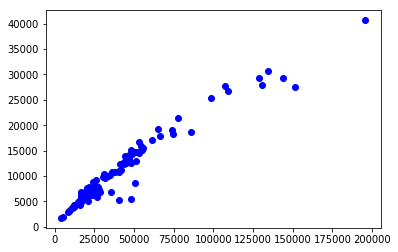

In [23]:
import matplotlib.pyplot as plt

plt.plot(stats.length,stats.unique,"bo")

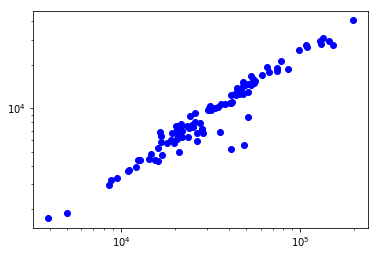

In [25]:
plt.loglog(stats.length,stats.unique,"bo")

In [34]:
stats[stats.author.str.startswith('Eng_')] 

,language,author,title,length,unique
75,./Books_EngFr,Eng_shakespeare,A Midsummer Night's Dream,16103,4345
76,./Books_EngFr,Eng_shakespeare,Richard III,48315,5535
77,./Books_EngFr,Eng_shakespeare,Othello,26590,5898
78,./Books_EngFr,Eng_shakespeare,The Merchant of Venice,20949,4978
79,./Books_EngFr,Eng_shakespeare,Macbeth,16874,4780
80,./Books_EngFr,Eng_shakespeare,Hamlet,28551,6776
81,./Books_EngFr,Eng_shakespeare,Romeo and Juliet,40776,5223


Text(0, 0.5, 'number of unique words')

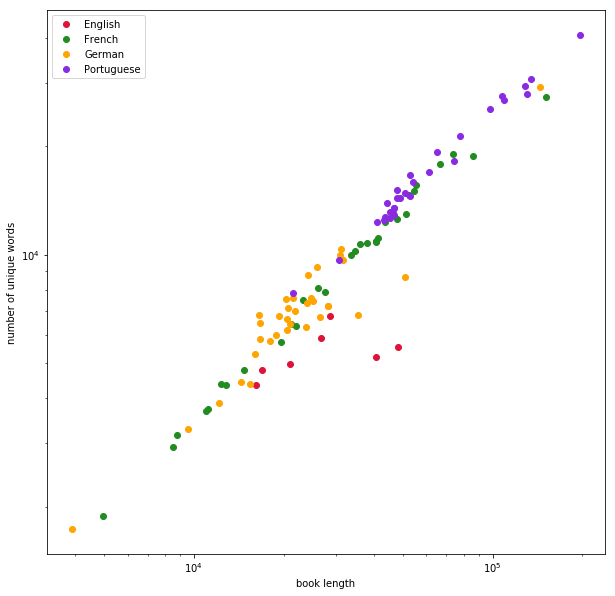

In [37]:
plt.figure(figsize=(10,10))
subset = stats[stats.author.str.startswith('Eng_')] 
plt.loglog(subset.length,subset.unique,"o",label="English",color="crimson")
subset = stats[stats.author.str.startswith('Frc_')] 
plt.loglog(subset.length,subset.unique,"o",label="French",color="forestgreen")
subset = stats[stats.author.str.startswith('Ger_')] 
plt.loglog(subset.length,subset.unique,"o",label="German",color="orange")
subset = stats[stats.author.str.startswith('Por_')] 
plt.loglog(subset.length,subset.unique,"o",label="Portuguese",color="blueviolet")
plt.legend()
plt.xlabel("book length")
plt.ylabel("number of unique words")